### Install PIL, and Import Packages

In [1]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

### My puzzle

Look at the image below. Please find the reddest pixels from top to bottom and solve the problem!

- Hint: The reddest pixels has a pixel value of (r,g,b)=(255,0,0), which is actually the reddest!

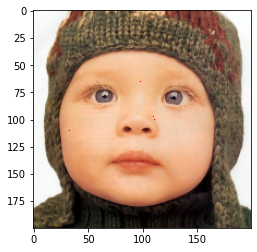

In [4]:
img=Image.open('./puzzle.png')
A=np.array(img)
plt.imshow(A)
plt.show()

### How to solve the puzzle

In [8]:
img=np.array(img)  # Change the format from Image to ndarray
red_channel = img[:,:,0]  # Get the red channel

# Find the pixels that are "red enough", the results generated by np.where() are in the order of "top to bottom".
rows=np.where(red_channel==255)[0]  # The array of the redest pixels' horizontal coordinates
cols=np.where(red_channel==255)[1]  # The array of the redest pixels' vertical coordinates
final=''
for i in range(len(rows)):  # ascii transformation with chr()
    final+=chr(rows[i])
    final+=chr(cols[i])
print('The answer is:',final)

The answer is: Abandon!


### How I generate the puzzle

First, an image with no "reddest pixels" is provided:

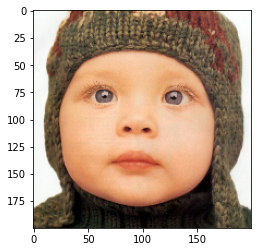

In [9]:
img=Image.open('./baby_200x200.png')
A=np.array(img)
plt.imshow(A)
plt.show()

Secondly, guarantee our selected points are "reddest":

In [10]:
A[:,:,0][A[:,:,0]>254]=254  # Avoid other pixels for "R=255".

Thirdly, use ASCII rule to translate the string "Abandon!" (note that the ASCII number satisfies A<a<d<n, which guarantees that when they are used as horizontal coordinates, the order of them is "from top to bottom".)

In [13]:
targets=[]
secrets=[]
love='Abandon!'  # To make the problem easier, the ASCII code: A<a<d<n
for i in range(len(love)):
    secrets.append(ord(love[i]))
for i in range(int(len(secrets)/2)):
    targets.append((secrets[2*i],secrets[2*i+1]))
for tar in targets:   # Make the four points generated by our string "reddest"
    A[tar[0],tar[1],0]=255  # R=255
    A[tar[0], tar[1], 1] = 0  # G=0
    A[tar[0], tar[1], 2] = 0  # B=0
print('Coordinates generated by "Abandon!":',targets)

Coordinates generated by "Abandon!": [(65, 98), (97, 110), (100, 111), (110, 33)]


Finally, show the puzzle image and save it.

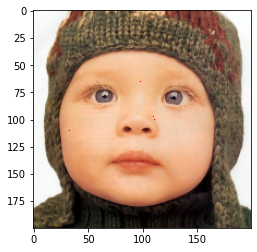

In [15]:
plt.imshow(A)
plt.show()
img_puzzle=Image.fromarray(A)
img_puzzle.save("./puzzle.png")